In [65]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime



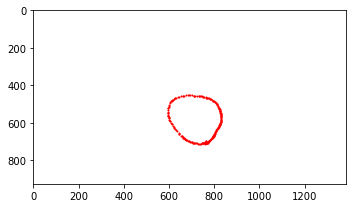

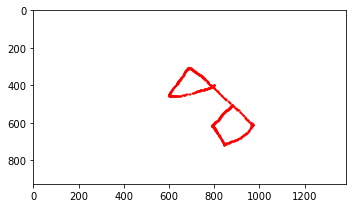

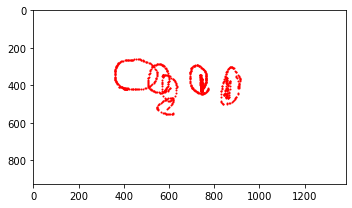

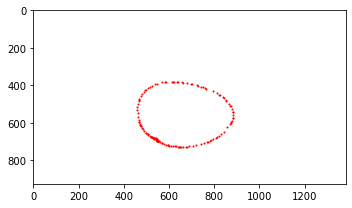

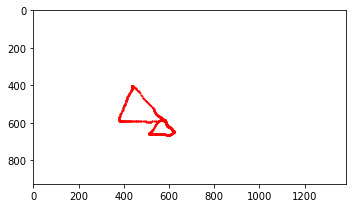

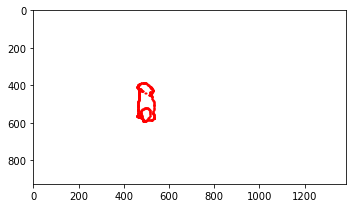

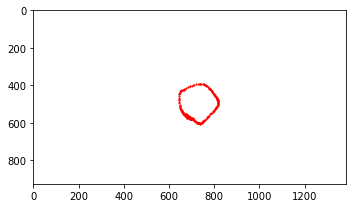

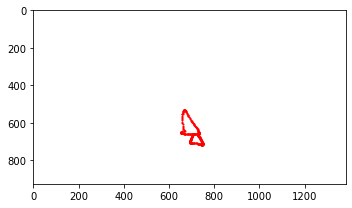

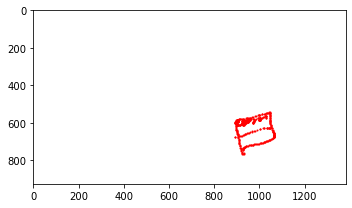


KeyboardInterrupt



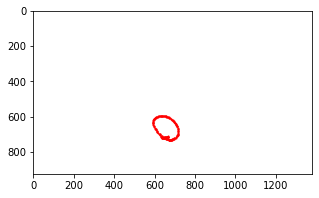

In [94]:
import psutil
train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(3,20,8):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [66]:
data = pd.read_csv(r'train/7554/SimpleTest/10.csv')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1231 non-null   object 
 1    Y         1229 non-null   float64
 2    Pressure  1229 non-null   float64
 3    TiltX     1229 non-null   float64
 4    TiltY     1229 non-null   float64
 5    Time      1229 non-null   object 
dtypes: float64(4), object(2)
memory usage: 57.8+ KB


In [68]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,946.388266543481,798.408130,0.186999,-4447.0,1009.0,00:03.4787405
1,946.862224275321,796.512299,0.190906,-4447.0,1009.0,00:03.4943781
2,946.388266543481,794.774454,0.190417,-4199.0,927.0,00:03.5099814


In [69]:
data.columns = data.columns.str.replace(' ', '')

In [70]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [71]:
print(submit_time)
print(start_time)

Time Elapsed till drawing submit: 00:49.7523306
Time Elapsed till drawing started: 00:03.4787405


In [72]:
#data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)
data['Time'] = data.Time.astype(str)
data = data.set_index(data['Time']).drop("Time", axis = 1)

In [73]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [74]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY
Time,,,,,
00:03.4787405,946.388267,798.408130,0.186999,-4447.0,1009.0
00:03.4943781,946.862224,796.512299,0.190906,-4447.0,1009.0
00:03.5099814,946.388267,794.774454,0.190417,-4199.0,927.0


<IPython.core.display.Javascript object>


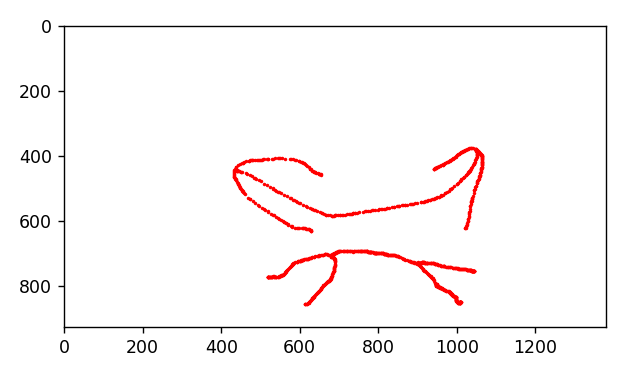

In [75]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


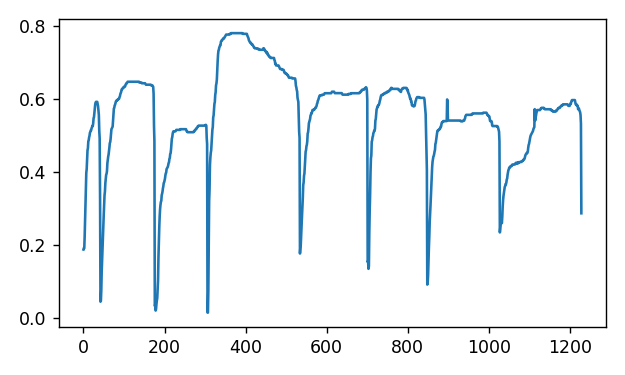

In [76]:
p = data.Pressure.tolist()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

ax.plot(p)

plt.tight_layout()
plt.show()

In [77]:
data.Pressure.sort_values()

Time
00:12.3279521    0.013901
00:12.3123365    0.013901
00:08.4545094    0.019516
00:08.4714278    0.023423
00:08.4232250    0.032456
                   ...   
00:13.2571427    0.780514
00:13.2571427    0.780514
00:13.2728394    0.780514
00:12.9694265    0.780514
00:13.1100386    0.780514
Name: Pressure, Length: 1229, dtype: float64

In [78]:
diff_list_y = np.diff(y)
diff_list_y = np.diff(y)
diff_list_y.min()
data.Pressure.mean()
data.Y.diff().mean()
data.index

Index(['00:03.4787405', '00:03.4943781', '00:03.5099814', '00:03.5256250',
       '00:03.5412356', '00:03.5569675', '00:03.5724849', '00:03.5724849',
       '00:03.5881057', '00:03.6037294',
       ...
       '00:36.6259491', '00:36.6259491', '00:36.6415725', '00:36.6572221',
       '00:36.6728354', '00:36.6884413', '00:36.6884413', '00:36.7040728',
       '00:36.7197060', '00:36.7197060'],
      dtype='object', name='Time', length=1229)

In [79]:
import math

def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist

distance = list()
for i in range(len(x)-1):
    distance.append(calculateDistance(x[i], y[i], x[i+1], y[i+1]))

In [80]:
np.std(distance)

27.562757138952637

In [81]:
np.sort(distance,)

array([  0.        ,   0.        ,   0.        , ..., 396.92428099,
       522.78081839, 547.64394397])

In [82]:
print('max distance:',max(distance),'\nmin distance:',min(distance))

# Adjusting the best distance 
bestDistance=5.52

numberOfLines=[]
count=0
for d in distance:
    if d>bestDistance:
        numberOfLines.append(d)
        count=count+1

print('Number of lines:',count)

max distance: 547.6439439716181 
min distance: 0.0
Number of lines: 94


In [83]:
hand_raising = 0
for i in range(len(x)-1):
    if ((x[i+1] - x[i] > 10) or( y[i+1] - y[i] > 10)):
        hand_raising +=1
            #print(i,i+1)
            #print(p[i], p[i+1])
            #print('x[i],y[i] :',x[i],',',y[i])
            #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 5 hand raising in the drawing


<IPython.core.display.Javascript object>


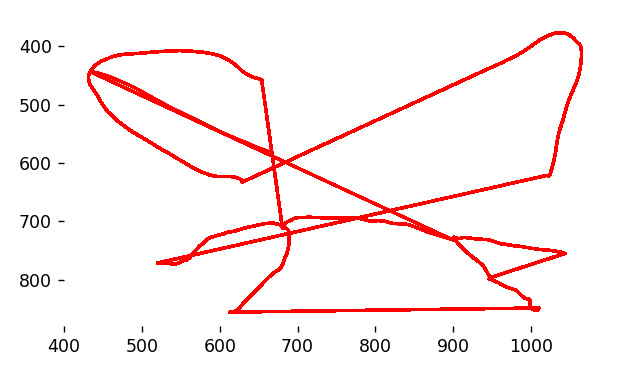

In [23]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [25]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(x[i])
    d.append(y[i])
    if (p[i] - data.Pressure.max() > p[i-1]):
        print(p[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()

KeyboardInterrupt: 

In [164]:
data.Pressure.min()

0.0295262075960636